In [1]:
%cd ..

/Users/juansegundohevia/Documents/RiceMDS/ELEC542/project


/Users/juansegundohevia/Documents/RiceMDS/ELEC542/project/.venv/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [30]:
import pandas as pd 
import json
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

DATA_PATH = "data/test-MagicBrush"

In [ ]:
PATH = "results/"

with open(os.path.join(PATH, "results-FINAL.json")) as f:
    results_summary = json.load(f)

In [5]:
df_results = pd.DataFrame(results_summary)

In [6]:
df_results

,path,prompt,image_path,image_id,prompt_type,evaluation_dataset_idx
0,EDS5.png,Adjust the colors of this scene to be shades o...,test/images/242679/242679-input.png,242679,color,5
1,EDS6.png,Adjust the colors of this scene to be tints of...,test/images/242679/242679-input.png,242679,color,6
2,EDS7.png,Adjust the colors of this scene to be a purple...,test/images/242679/242679-input.png,242679,color,7
3,EDS8.png,Adjust the colors of this scene to be a green ...,test/images/242679/242679-input.png,242679,color,8
4,EDS9.png,Adjust the colors of this scene to be a yellow...,test/images/242679/242679-input.png,242679,color,9
...,...,...,...,...,...,...
995,EDS990.png,Adjust the colors of this scene to be sadder.,test/images/137100/137100-input.png,137100,conceptual,990
996,EDS991.png,Adjust the colors of this scene to be happier.,test/images/137100/137100-input.png,137100,conceptual,991
997,EDS992.png,Adjust the colors of this scene to be dramatic.,test/images/137100/137100-input.png,137100,conceptual,992
998,EDS993.png,Adjust the colors of this scene to be joyful.,test/images/137100/137100-input.png,137100,conceptual,993


In [7]:
df_results["edit"] = df_results.prompt.str.replace("Adjust the colors of this scene to be", "").str.replace(".", "").str.strip()
df_results.sample(5)

,path,prompt,image_path,image_id,prompt_type,evaluation_dataset_idx,edit
360,EDS725.png,Adjust the colors of this scene to be shades o...,test/images/262710/262710-input.png,262710,color,725,shades of red
67,EDS137.png,Adjust the colors of this scene to be a purple...,test/images/560472/560472-input.png,560472,color,137,a purple palette
441,EDS886.png,Adjust the colors of this scene to be tints of...,test/images/89648/89648-input.png,89648,color,886,tints of blue
214,EDS429.png,Adjust the colors of this scene to be a yellow...,test/images/331816/331816-input.png,331816,color,429,a yellow hue
836,EDS671.png,Adjust the colors of this scene to be happier.,test/images/88759/88759-input.png,88759,conceptual,671,happier


In [35]:
def plot_img(path: str, prompt: str = None, original_path: str = None):


    img = Image.open(os.path.join(PATH, "results/", path))

    if original_path:
        img_original = Image.open(os.path.join(DATA_PATH, original_path))
        plt.subplot(1, 2, 1)
        plt.imshow(img_original)
        plt.axis("off")
        plt.title("original")
        plt.subplot(1, 2, 2)
        plt.imshow(img)
        plt.axis("off")
        if prompt:
            plt.title(prompt)
    else:
        plt.imshow(img)
        plt.axis("off")
        if prompt:
            plt.title(prompt)


    plt.show()

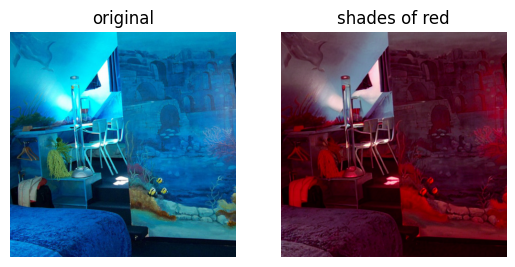

In [43]:
_x = df_results.sample()
plot_img(_x.path.values[0], _x.edit.values[0], original_path=_x.image_path.values[0])

# Extract the palette from the conceptual images

In [51]:
from mmcq import get_palette, get_dominant_color

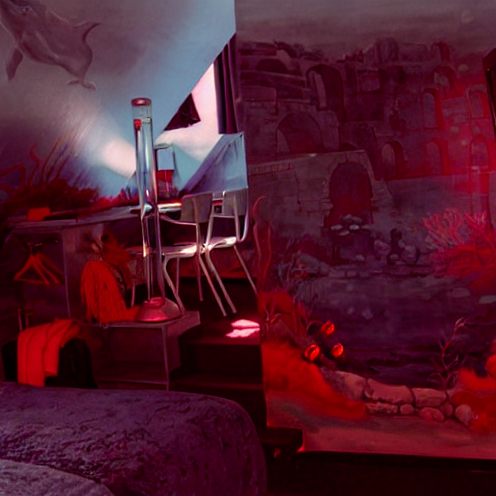

In [54]:
gen_path = os.path.join(PATH, "results", _x.path.values[0])
gen_img = Image.open(gen_path)
gen_img

In [66]:
from PIL import ImageDraw

out = Image.new("RGB", (1000, 1000), (255, 255, 255))
d = ImageDraw.Draw(out)

with get_palette(gen_path, color_count=5) as _palette:
    gen_palette = _palette

In [70]:
gen_palette

[(132, 122, 139), (107, 19, 36), (55, 8, 23), (98, 60, 81), (68, 77, 108)]

In [71]:
get_dominant_color(gen_path)

(107, 19, 36)

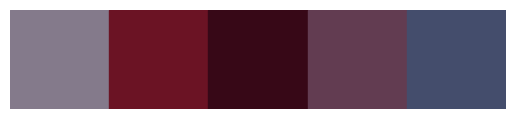

In [81]:
# plot palette
fig, ax = plt.subplots(1, 1)

for i, color in enumerate(gen_palette):
    # normalize 
    norm_color = [c / 255 for c in color]
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=norm_color))

ax.set_xlim(0, len(gen_palette))
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis("off")
plt.show()

In [83]:
class ImagePalette:
    def __init__(self, path: str, color_count: int = 5):
        self.path = path
        self.color_count = color_count
        with get_palette(path, color_count=color_count) as palette:
            self.palette = palette

        self.dominant_color = get_dominant_color(path)

    def plot(self):
        fig, ax = plt.subplots(1, 1)

        for i, color in enumerate(self.palette):
            # normalize 
            norm_color = [c / 255 for c in color]
            ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=norm_color))

        ax.set_xlim(0, len(self.palette))
        ax.set_ylim(0, 1)
        ax.set_aspect('equal')
        ax.axis("off")
        plt.show()

    def __repr__(self):
        return f"ImagePalette(path={self.path}, color_count={self.color_count}),colors={self.palette})"
    
    def __str__(self):
        return " ".join([f"rgb({c[0]}, {c[1]}, {c[2]})" for c in self.palette])
    
    def get_colors(self):
        return self.palette


In [84]:
# compute color palettes and dominant colors for each generated image
from tqdm import tqdm


palettes = []
dom_colors = []
for path in tqdm(df_results.path):
    palette = ImagePalette(os.path.join(PATH, "results", path))
    palettes.append(palette.get_colors())
    dom_colors.append(palette.dominant_color)

df_results["palette"] = palettes
df_results["dominant_color"] = dom_colors

100%|██████████| 1000/1000 [02:52<00:00,  5.80it/s]


In [85]:
df_results.sample(5)

,path,prompt,image_path,image_id,prompt_type,evaluation_dataset_idx,edit,palette,dominant_color
179,EDS359.png,Adjust the colors of this scene to be a yellow...,test/images/335874/335874-input.png,335874,color,359,a yellow hue,"[(189, 187, 101), (188, 178, 33), (59, 50, 14)...","(199, 198, 105)"
907,EDS812.png,Adjust the colors of this scene to be dramatic.,test/images/385190/385190-input.png,385190,conceptual,812,dramatic,"[(34, 41, 44), (199, 198, 198), (123, 121, 133...","(209, 210, 212)"
882,EDS762.png,Adjust the colors of this scene to be dramatic.,test/images/376839/376839-input.png,376839,conceptual,762,dramatic,"[(42, 36, 46), (198, 159, 125), (140, 111, 75)...","(33, 23, 31)"
984,EDS964.png,Adjust the colors of this scene to be dreamy.,test/images/75216/75216-input.png,75216,conceptual,964,dreamy,"[(61, 124, 62), (18, 52, 30), (178, 222, 210),...","(178, 222, 210)"
523,EDS43.png,Adjust the colors of this scene to be joyful.,test/images/141946/141946-input.png,141946,conceptual,43,joyful,"[(59, 59, 76), (198, 192, 187), (152, 50, 65),...","(55, 52, 68)"


# Compute average dominant colors for each edit

In [98]:
df_results["dc_arr"] = df_results.dominant_color.apply(lambda x: np.array(x))

In [122]:
df_results["dc_arr"].values.reshape(1, 1000).mean(1)

array([array([138.526, 135.31 , 123.4  ])], dtype=object)

In [131]:
avg_colors = df_results.groupby("edit")\
    .dc_arr\
    .apply(lambda col_series: col_series.values.reshape(1, col_series.shape[0]).mean(1)[0])\
    .to_dict()

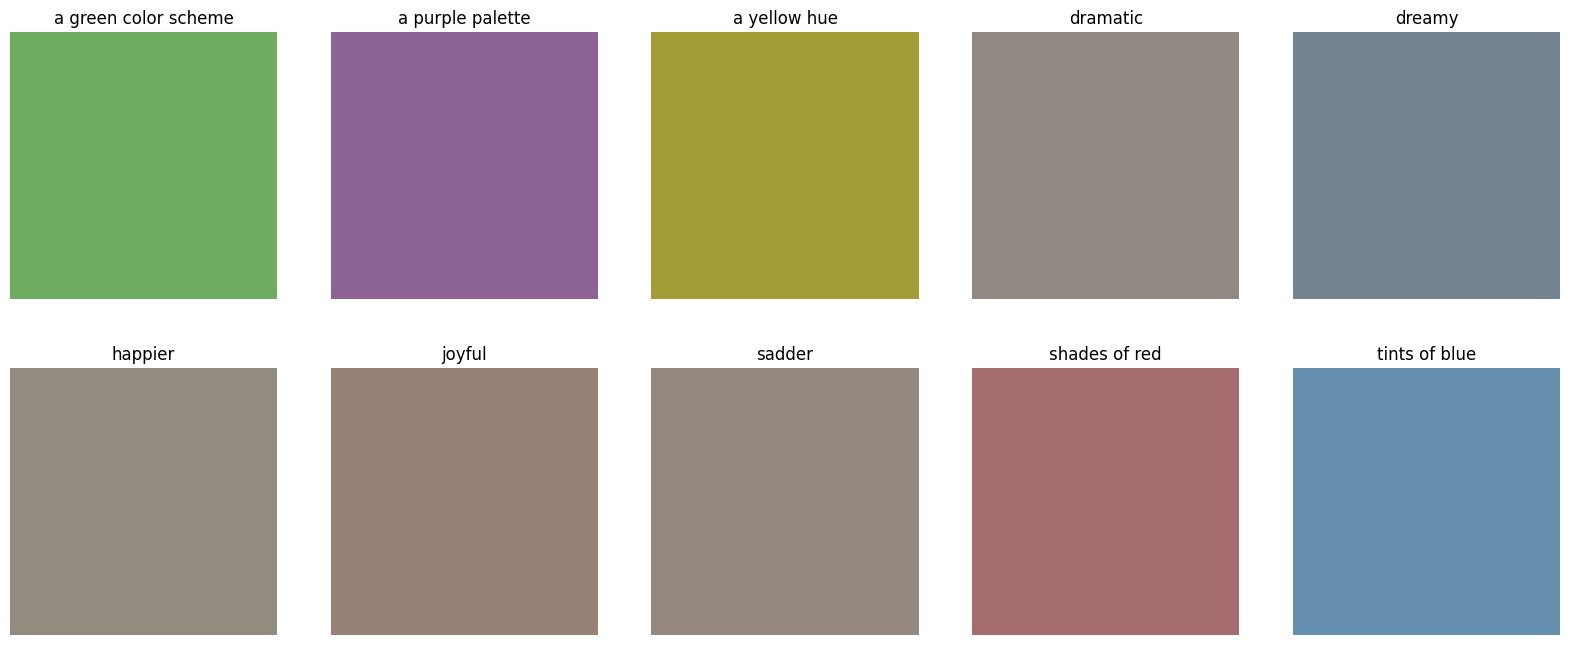

In [146]:
# plot avg palettes
num_colors = len(avg_colors)
num_cols = 5
num_rows = (num_colors + num_cols - 1) // num_cols

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 4 * num_rows))

for i, (edit, color) in enumerate(avg_colors.items()):
    ax[i // num_cols, i % num_cols].add_patch(plt.Rectangle((0, 0), 1, 1, color=[c / 255 for c in color]))
    ax[i // num_cols, i % num_cols].set_xlim(0, 1)
    ax[i // num_cols, i % num_cols].set_ylim(0, 1)
    ax[i // num_cols, i % num_cols].set_aspect('equal')
    ax[i // num_cols, i % num_cols].axis("off")
    ax[i // num_cols, i % num_cols].set_title(edit)

# Hide any unused subplots
for j in range(i + 1, num_rows * num_cols):
    fig.delaxes(ax.flatten()[j])


plt.show()

# Compute average palettes

In [ ]:
df_results["palette_arr"] = df_results.palette.apply(lambda x: np.array(x))

In [155]:
!pip install scikit-learn

  Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp311-cp311-macosx_12_0_arm64.whl (11.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 37.7 MB/s eta 0:00:00a 0:00:01
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [156]:
from sklearn.cluster import KMeans

In [162]:

def compute_avg_palette(img_palettes, seed: int = 42):
    """
    Given an series of 5-element arrays with the colors present in an image
    compute the average color palette by doing:

    1. take each color separately and build a (5 * len(img_palettes), 3) vector
    2. create a cluster of 5 colors using kmeans
    3 return the cluster centers
    """
    colors = np.concatenate(img_palettes.values)
    print(colors.shape)
    kmeans = KMeans(n_clusters=5, random_state=seed).fit(colors)
    return kmeans.cluster_centers_

reds_palette = compute_avg_palette(df_results[df_results.edit == "shades of red"].palette_arr)
reds_palette

(488, 3)


array([[147.49107143,  29.45535714,  34.96428571],
       [ 94.68      ,  83.82666667,  86.57333333],
       [ 55.40206186,  15.84536082,  21.32989691],
       [172.16312057,  99.4822695 ,  97.70212766],
       [202.47619048, 174.12698413, 177.82539683]])

<Axes: >

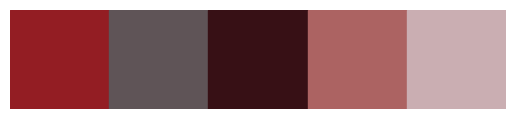

In [165]:
# plot palette
def plot_palette(palette, ax=None, title: str = None):
    if ax is None:
        fig, ax = plt.subplots(1, 1)

    for i, color in enumerate(palette):
        # normalize 
        norm_color = [c / 255 for c in color]
        ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=norm_color))

    ax.set_xlim(0, len(palette))
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    if title:
        ax.set_title(title)
    ax.axis("off")
    
    return ax

plot_palette(reds_palette)

In [166]:
# compute average palettes for all
avg_palettes = df_results.groupby("edit")\
    .palette_arr\
    .apply(lambda col_series: compute_avg_palette(col_series))\
    .to_dict()

(488, 3)
(488, 3)
(496, 3)
(492, 3)
(480, 3)
(492, 3)
(488, 3)
(492, 3)
(488, 3)
(488, 3)


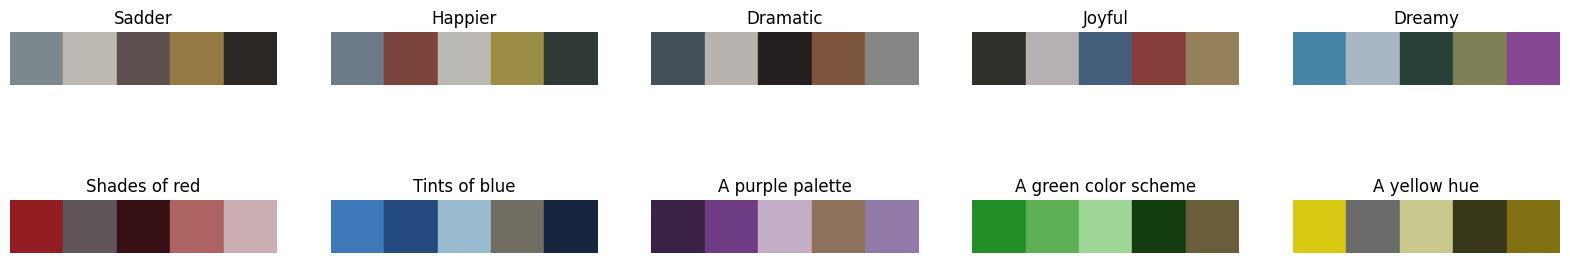

In [175]:
# arrange them in 2 rows, conceptual below, color above
from prompts import CONCEPTUAL_PROMPTS, COLOR_PROMPTS

num_colors = len(avg_palettes)
num_cols = 5
num_rows = (num_colors + num_cols - 1) // num_cols

fig, ax = plt.subplots(num_rows, num_cols, figsize=(20, 2 * num_rows))

for idx, cp in enumerate(CONCEPTUAL_PROMPTS):
    palette = avg_palettes[cp.lower()]
    plot_palette(palette, ax=ax[idx // num_cols, idx % num_cols], title=cp)

for idx, cp in enumerate(COLOR_PROMPTS):
    palette = avg_palettes[cp.lower()]
    plot_palette(palette, ax=ax[idx // num_cols + 1, idx % num_cols], title=cp)

# test library

In [246]:
import importlib
import palette_analysis

importlib.reload(palette_analysis)

<module 'palette_analysis' from '/Users/juansegundohevia/Documents/RiceMDS/ELEC542/project/palette_analysis.py'>

In [247]:
pa = palette_analysis.PaletteAnalysis(
    results_summary_path=os.path.join(PATH, "results-FINAL.json"),
    img_path=DATA_PATH,
    results_path=PATH   
)

100%|██████████| 1000/1000 [02:46<00:00,  6.02it/s]


In [234]:
avg_palettes = pa.get_avg_palettes()

In [235]:
# replace the keys to remove the TEMPLATE_PROMPT
from prompts import TEMPLATE_PROMPT
avg_palettes = {k.replace(TEMPLATE_PROMPT.format(term="").replace(".", ""), "").strip(): v for k, v in avg_palettes.items()}
avg_palettes

{'a green color scheme': array([[ 34.46534653, 142.37623762,  39.92079208],
        [ 95.20454545, 175.14393939,  85.41666667],
        [158.44680851, 214.45744681, 150.29787234],
        [ 18.87058824,  60.70588235,  17.21176471],
        [103.57894737,  94.34210526,  57.75      ]]),
 'a purple palette': array([[ 59.42222222,  33.42222222,  67.26666667],
        [111.0703125 ,  59.53125   , 134.4296875 ],
        [194.51315789, 172.55263158, 199.47368421],
        [141.69411765, 112.52941176,  92.27058824],
        [145.625     , 121.5       , 168.28125   ]]),
 'a yellow hue': array([[215.94782609, 202.40869565,  18.88695652],
        [104.75757576, 106.72727273, 104.87878788],
        [201.48648649, 200.95945946, 141.7972973 ],
        [ 56.81081081,  55.20720721,  26.3963964 ],
        [126.64417178, 111.56441718,  18.28220859]]),
 'dramatic': array([[ 69.36879433,  79.46808511,  88.60992908],
        [183.74285714, 179.45714286, 174.85714286],
        [ 36.97938144,  31.12371134,  

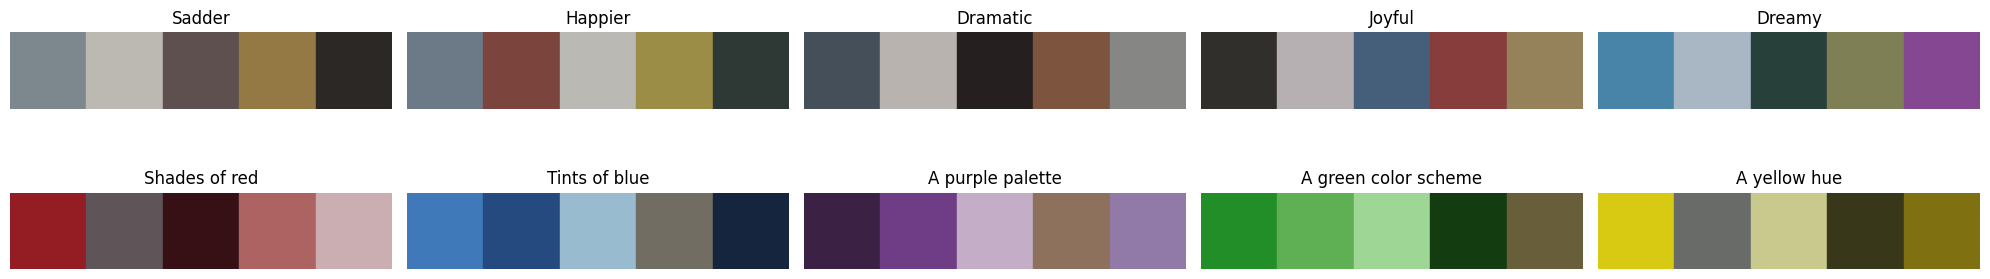

In [236]:
pa.plot_avg_palette(avg_palettes=avg_palettes)

# Compute color metrics

In [ ]:
from skimage import color
import numpy as np

class ColorMetrics:
    def __init__(self, generated_img, original_img):
        """
        Initialize with generated and original images.
        :param generated_img: The generated image as a NumPy array.
        :param original_img: The original image as a NumPy array.
        """
        self.generated_img = generated_img
        self.original_img = original_img

    def _saturation(self, img):
        """
        Calculate the mean saturation of an image.
        :param img: Image in RGB format as a NumPy array.
        :return: Mean saturation value.
        """
        hsv_image = color.rgb2hsv(img)
        return np.mean(hsv_image[:, :, 1])

    def _brightness(self, img):
        """
        Calculate the mean brightness of an image.
        :param img: Image in RGB format as a NumPy array.
        :return: Mean brightness value.
        """
        gray_image = color.rgb2gray(img)
        return np.mean(gray_image)

    def _colorfulness(self, img):
        """
        Calculate the colorfulness of an image.
        :param img: Image in RGB format as a NumPy array.
        :return: Colorfulness metric.
        """
        # Split image into R, G, B channels
        R, G, B = img[:, :, 0], img[:, :, 1], img[:, :, 2]
        rg = np.abs(R - G)
        yb = np.abs(0.5 * (R + G) - B)

        # Calculate the mean and standard deviation of rg and yb
        std_rg, std_yb = np.std(rg), np.std(yb)
        mean_rg, mean_yb = np.mean(rg), np.mean(yb)

        # Compute the colorfulness metric
        colorfulness = np.sqrt(std_rg**2 + std_yb**2) + 0.3 * np.sqrt(mean_rg**2 + mean_yb**2)
        return colorfulness

    def _contrast(self, img):
        """
        Calculate the contrast of an image using the standard deviation of intensity values.
        :param img: Image in RGB format as a NumPy array.
        :return: Contrast value.
        """
        gray_image = color.rgb2gray(img)
        return np.std(gray_image)

    def compare_metrics(self):
        """
        Compare metrics between the generated and original images.
        :return: Dictionary of metrics for generated and original images.
        """
        metrics = {}
        metrics["generated"] = {
            "saturation": self._saturation(self.generated_img),
            "brightness": self._brightness(self.generated_img),
            "colorfulness": self._colorfulness(self.generated_img),
            "contrast": self._contrast(self.generated_img),
        }
        metrics["original"] = {
            "saturation": self._saturation(self.original_img),
            "brightness": self._brightness(self.original_img),
            "colorfulness": self._colorfulness(self.original_img),
            "contrast": self._contrast(self.original_img),
        }
        return metrics

Text(0.5, 1.0, 'Adjust the colors of this scene to be a yellow hue.')

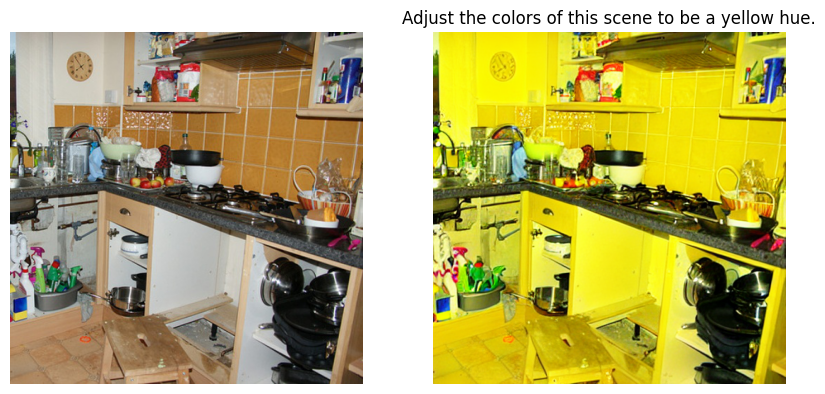

In [244]:
# already incldued in the PaletteAnalysis class
sample_res = df_results.sample() 
sample_gen_img = Image.open(os.path.join(PATH, "results", sample_res.path.values[0]))
sample_orig_img = Image.open(os.path.join(DATA_PATH, sample_res.image_path.values[0]))

# plot both images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(sample_orig_img)
ax[0].axis("off")

ax[1].imshow(sample_gen_img)
ax[1].axis("off")

plt.title(sample_res.prompt.values[0])

In [249]:
metrics = pa.compute_metrics()

165it [26:54,  9.78s/it] 


OSError: [Errno 89] Operation canceled